In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import hdbscan
import matplotlib.pyplot as plt

# Determine Clustering Accuracy

In [27]:
#Import 2-dim coordinates from dimensionality reduction methods (rsem_zscores_v_diploid_results)
coord_df1 = pd.read_csv('/Users/emilypark/ECE-204_Projects/Data/meta_with_coordinates_all_rsem2.txt', sep='\t')

#Rename PCA column for consistency in the following functions
coord_df1.rename(columns = {'PC1': 'PCA_x', 'PC2': 'PCA_y'}, inplace=True)
coord_df1

,patient_id,type,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,histological_type,histological_grade,tumor_status,vital_status,...,subtype,tissue_source_site,PCA_x,PCA_y,MDS_x,MDS_y,umap_x,umap_y,tsne_x,tsne_y
0,TCGA-3M-AB46,STAD,70.0,MALE,WHITE,Stage IB,"Stomach, Adenocarcinoma, Not Otherwise Specifi...",G2,TUMOR FREE,Alive,...,STAD_CIN,University of Kansas Medical Center,-84.088986,-12.269245,-59.455908,32.123656,0.496715,0.006571,-5.400001,-10.476531
1,TCGA-3M-AB47,STAD,51.0,MALE,WHITE,Stage IIIB,"Stomach, Adenocarcinoma, Not Otherwise Specifi...",G3,WITH TUMOR,Dead,...,STAD_GS,University of Kansas Medical Center,14.214487,-2.808952,27.348535,-13.668437,-0.732420,1.036072,2.691580,0.851657
2,TCGA-B7-5816,STAD,51.0,FEMALE,WHITE,Stage IIB,"Stomach, Adenocarcinoma, Diffuse Type",G3,TUMOR FREE,Alive,...,STAD_MSI,Cureline,14.547549,44.897841,12.730063,-62.671327,0.010913,1.787266,1.342092,6.649742
3,TCGA-B7-5818,STAD,62.0,MALE,WHITE,Stage IB,"Stomach, Adenocarcinoma, Diffuse Type",G3,TUMOR FREE,Alive,...,STAD_EBV,Cureline,-31.493970,58.370682,-34.272862,-58.602624,-0.340514,1.543503,-10.335105,-4.818122
4,TCGA-B7-A5TI,STAD,52.0,MALE,WHITE,Stage IIIC,"Stomach, Adenocarcinoma, Diffuse Type",G3,TUMOR FREE,Alive,...,STAD_MSI,Cureline,-19.615106,22.574129,-10.709112,-28.560673,-0.959097,1.213376,-3.376726,-3.299296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21.297459,-26.039420,48.851406,-2.736958,1.184027,-0.132189,1.556192,3.042369
408,TCGA-CG-4474,STAD,67.0,FEMALE,[Not Available],Stage IV,"Stomach, Adenocarcinoma, Diffuse Type",G3,WITH TUMOR,Alive,...,STAD_GS,Indivumed,6.319234,8.280322,15.940896,-21.249565,1.951239,-0.258737,1.466030,0.504818
409,TCGA-CG-4475,STAD,76.0,MALE,[Not Available],Stage IIB,[Not Available],G3,TUMOR FREE,Alive,...,STAD_CIN,Indivumed,-13.226311,-28.100900,17.465830,12.320889,-0.124245,-1.309264,10.424889,0.616334
410,TCGA-CG-4476,STAD,69.0,MALE,[Not Available],Stage IIIC,"Stomach, Adenocarcinoma, Diffuse Type",G3,TUMOR FREE,Alive,...,STAD_CIN,Indivumed,11.048112,-30.191950,38.469856,7.938989,1.278403,-0.260693,1.518850,2.684278


In [33]:
#Import 2-dim coordinates from dimensionality reduction methods (TCGA.STAD.expression_results)
coord_df2 = pd.read_csv('/Users/emilypark/ECE-204_Projects/Data/meta_with_coordinates_all_tcga2.txt', sep='\t')

#Rename PCA column for consistency in the following functions
coord_df2.rename(columns = {'PC1': 'PCA_x', 'PC2': 'PCA_y'}, inplace=True)
coord_df2

,patient_id,type,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,histological_type,histological_grade,tumor_status,vital_status,...,Plate,Center,PCA_x,PCA_y,MDS_x,MDS_y,umap_x,umap_y,tsne_x,tsne_y
0,TCGA-CG-4460,STAD,66.0,FEMALE,[Not Available],Stage IV,"Stomach, Intestinal Adenocarcinoma, Not Otherw...",G2,WITH TUMOR,Dead,...,1157,13,-13.325632,52.718486,8.696516,15.964354,1.680916,1.631035,6.754120,-7.301456
1,TCGA-CG-5716,STAD,86.0,MALE,[Not Available],Stage IV,"Stomach, Adenocarcinoma, Not Otherwise Specifi...",G2,WITH TUMOR,Alive,...,1802,13,19.619261,-42.827088,19.303249,13.870497,2.684702,0.711457,8.924368,-9.835911
2,TCGA-HF-7131,STAD,NaN,FEMALE,[Not Available],Stage IB,"Stomach, Adenocarcinoma, Not Otherwise Specifi...",G2,TUMOR FREE,Alive,...,2055,13,21.918206,-15.837585,20.351895,9.695008,1.575976,1.778829,7.654260,-6.009414
3,TCGA-3M-AB46,STAD,70.0,MALE,WHITE,Stage IB,"Stomach, Adenocarcinoma, Not Otherwise Specifi...",G2,TUMOR FREE,Alive,...,A414,31,34.628991,21.674575,20.431576,-0.187592,-0.416392,-0.097643,-1.292906,-8.622324
4,TCGA-3M-AB47,STAD,51.0,MALE,WHITE,Stage IIIB,"Stomach, Adenocarcinoma, Not Otherwise Specifi...",G3,WITH TUMOR,Dead,...,A414,31,-18.297531,-6.882355,-11.562594,-23.957929,-0.231652,-1.348031,-7.899393,4.507641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,TCGA-CG-4469,STAD,70.0,MALE,[Not Available],Stage IV,"Stomach, Intestinal Adenocarcinoma, Not Otherw...",G3,NaN,Dead,...,1157,13,18.665746,33.826620,25.173236,-5.067783,0.135535,1.138485,-0.735693,-3.652545
443,TCGA-CG-4474,STAD,67.0,FEMALE,[Not Available],Stage IV,"Stomach, Adenocarcinoma, Diffuse Type",G3,WITH TUMOR,Alive,...,1157,13,3.416297,4.493791,12.261078,-15.101346,0.829686,-0.286195,-2.907890,2.339434
444,TCGA-CG-4475,STAD,76.0,MALE,[Not Available],Stage IIB,[Not Available],G3,TUMOR FREE,Alive,...,1157,13,-9.047345,15.146688,-1.648910,6.941963,1.180536,0.597593,6.325461,7.284631
445,TCGA-CG-4476,STAD,69.0,MALE,[Not Available],Stage IIIC,"Stomach, Adenocarcinoma, Diffuse Type",G3,TUMOR FREE,Alive,...,1157,13,-22.853941,15.274395,-4.479712,-21.153818,0.367223,-0.224630,-0.965687,3.205056


In [5]:
from sklearn.metrics import silhouette_score

def silhouette(coord_df, n_clusters=2, n_iterations=10):
    '''
    Calculate average Silhouette scores over n_iterations
    for each clustering method, using 2-D coordinates of 
    4 dimensionality reduction methods: MDS, UMAP, t-SNE, PCA.
    Scales results between -1 and 1 (good clustering if positive). 
    
    Inputs:
    coord_df(pd.DataFrame): Table of 2-D coordinates of each dim-reduction method.
    
    n_clusters(int): Number of clusters to input into clustering methods. Default is 2.
    
    n_iterations(int): Number of iterations to run each clustering method.
    
    Returns:
    silhouette_scores(dict): Average Silhouette scores for each clustering and dimensionality reduction method 
    '''
    
    # Initialize list of dim reduction methods
    methods = ['MDS', 'umap', 'tsne', 'PCA']
    # Initialize dictionary to store silhouette scores
    silhouette_scores = {method: {} for method in methods}
    
    # Loop through each dim reduction method
    for method in methods:
        # Get coordinates from each dimensionality reduction method
        coords = coord_df[[f'{method}_x', f'{method}_y']].to_numpy()
        
        # Initialize dict to store silhouette scores for each dimensionality reduction method
        # Keys are different clustering methods
        silhouette_scores[method] = {
            'kmeans': [],
            'spectral': [],
            'hierarchical': [],
            'gmm': [],
            'hdbscan': []
        }
        
        # Iterate n_iterations times
        for _ in range(n_iterations):
            # Initialize KMeans Model
            kmeans = KMeans(n_clusters=n_clusters)
            # Fit and predict kmeans labels
            kmeans_labels = kmeans.fit_predict(coords)
            # Find silhouette score using kmeans predicted labels and coordinate values
            silhouette_kmeans = silhouette_score(coords, kmeans_labels)
            silhouette_scores[method]['kmeans'].append(silhouette_kmeans)

            # Initialize Spectral Clustering Model
            spectral = SpectralClustering(n_clusters=n_clusters, affinity='rbf')
            # Fit and predict spectral predicted labels
            spectral_labels = spectral.fit_predict(coords)
            # Try affinity= 'nearest_neighbors' if error occurs
            if "Graph is not fully connected, spectral embedding may not work as expected" in spectral.__str__():
                spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors')
                spectral_labels = spectral.fit_predict(coords)
            # Find silhouette score using spectral predicted labels and coordinate values
            silhouette_spectral = silhouette_score(coords, spectral_labels)
            silhouette_scores[method]['spectral'].append(silhouette_spectral)
            
            # Initialize Agglomerative Hierarchical Clustering Model
            hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
            # Fit and predict Hierarchical clustering predicted labels
            hierarchical_labels = hierarchical.fit_predict(coords)
            # Find silhouette score using hierarchcial predicted labels and coordinate values
            silhouette_hierarchical = silhouette_score(coords, hierarchical_labels)
            silhouette_scores[method]['hierarchical'].append(silhouette_hierarchical)

            # Initialize Gaussian Mixture Model (gmm)
            gaussian_mixture = GaussianMixture(n_components=n_clusters)
            # Fit and predict labels for gmm
            gaussian_mixture.fit(coords)
            gaussian_mixture_labels = gaussian_mixture.predict(coords)
            # Find silhouette score using gmm predicted labels and coordinate values
            silhouette_gaussian_mixture = silhouette_score(coords, gaussian_mixture_labels)
            silhouette_scores[method]['gmm'].append(silhouette_gaussian_mixture)

            # Initialize HDBSCAN
            hdbscan_cluster = hdbscan.HDBSCAN(min_cluster_size=10)
            # Fit and predict labels for hdbscan
            hdbscan_labels = hdbscan_cluster.fit_predict(coords)
            # Find silhouette score using hdbscan predicted labels and coordinate values
            silhouette_hdbscan = silhouette_score(coords, hdbscan_labels)
            silhouette_scores[method]['hdbscan'].append(silhouette_hdbscan)

        # Calculate average Silhouette scores for each clustering method
        silhouette_scores[method] = {key: np.mean(value) for key, value in silhouette_scores[method].items()}
    
    return silhouette_scores


In [28]:
silhouette_scores1 = silhouette(coord_df1)
print(silhouette_scores1)

/Users/emilypark/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/emilypark/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/emilypark/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/emilypark/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not f

{'MDS': {'kmeans': 0.38461183054693604, 'spectral': 0.21453111214779313, 'hierarchical': 0.3234778412144005, 'gmm': 0.42492349970872045, 'hdbscan': -0.15819982259428442}, 'umap': {'kmeans': 0.3903331157681397, 'spectral': 0.4054048165939779, 'hierarchical': 0.39153876688842926, 'gmm': 0.3908507640410278, 'hdbscan': 0.020347120854350257}, 'tsne': {'kmeans': 0.3851695421412327, 'spectral': 0.19348861299062, 'hierarchical': 0.3393252800503713, 'gmm': 0.38397003339276264, 'hdbscan': -0.0682134567715266}, 'PCA': {'kmeans': 0.38029814045107296, 'spectral': 0.48066521772066756, 'hierarchical': 0.3623804512998326, 'gmm': 0.41917373893609416, 'hdbscan': 0.00025836574347405997}}


In [34]:
silhouette_scores2 = silhouette(coord_df2)
print(silhouette_scores2)

{'MDS': {'kmeans': 0.6319345513439611, 'spectral': 0.40916104636450024, 'hierarchical': 0.6049343714639638, 'gmm': 0.5809095710881332, 'hdbscan': 0.6122978180591864}, 'umap': {'kmeans': 0.54180414763668, 'spectral': 0.5824461350450558, 'hierarchical': 0.5080474047423704, 'gmm': 0.4900571131068715, 'hdbscan': 0.4732286917406519}, 'tsne': {'kmeans': 0.38060718865525567, 'spectral': 0.273484505571102, 'hierarchical': 0.3382591078531872, 'gmm': 0.39617241584529195, 'hdbscan': 0.11558528860151021}, 'PCA': {'kmeans': 0.4957937692751562, 'spectral': 0.3338451833976322, 'hierarchical': 0.5757056233765645, 'gmm': 0.5065421139090589, 'hdbscan': -0.16012728910851054}}


## Find Average Normalized Mutual Information (NMI) and Adjusted Rand Index (ARI)

In [11]:
# Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import hdbscan

# Calculate NMI and ARI scores
def calculate_scores(coord_df, ground_truth_labels, n_clusters=2, n_iterations=10):
    '''
    Calculate average NMI and ARI over n_iterations for each clustering method, 
    using 2-D coordinates of 4 dimensionality reduction methods: MDS, UMAP, t-SNE, PCA.
    Scales results between 0 and 1 (perfect correlation). 
    
    Inputs:
    coord_df(pd.DataFrame): Table of 2-D coordinates of each dim-reduction method.
    
    ground_truth_labels(pd.Series): Metadata column used to find NMI score when 
    compared to labels found from clustering.
    
    n_clusters(int): Number of clusters to input into clustering methods. Default is 2.
    
    n_iterations(int): Number of iterations to run each clustering method.
    
    Returns:
    nmi_scores(dict): Average NMI scores for each clustering and dimensionality reduction method 
    ari_scores(dict): Average ARI scores for each clustering and dimensionality reduction method 
    '''
    
    # Initialize list of dim reduction methods
    methods = ['MDS', 'umap', 'tsne', 'PCA']
    # Initialize dicts to store NMI and ARI scores
    nmi_scores = {method: {} for method in methods}
    ari_scores = {method: {} for method in methods}
    
    # Loop through each dim-reduction method
    for method in methods:
        # Get coordinates from each dimensionality reduction method
        coords = coord_df[[f'{method}_x', f'{method}_y']].to_numpy()
        
        # Initialize dicts to store NMI and ARI scores for each dimensionality reduction method
        # Keys are different clustering methods
        nmi_scores[method] = {
            'kmeans': [],
            'spectral': [],
            'hierarchical': [],
            'gmm': [],
            'hdbscan': []
        }
        
        ari_scores[method] = {
            'kmeans': [],
            'spectral': [],
            'hierarchical': [],
            'gmm': [],
            'hdbscan': []
        }
        
        # Iterate n_iterations times
        for _ in range(n_iterations):
            # Initialize KMeans Model
            kmeans = KMeans(n_clusters=n_clusters)
            # Fit and predict kmeans labels
            kmeans_labels = kmeans.fit_predict(coords)
            #Calculate NMI
            nmi_kmeans = normalized_mutual_info_score(ground_truth_labels, kmeans_labels)
            nmi_scores[method]['kmeans'].append(nmi_kmeans)
            #Calculate ARI
            ari_kmeans = adjusted_rand_score(ground_truth_labels, kmeans_labels)
            ari_scores[method]['kmeans'].append(ari_kmeans)
            
            # Initialize Spectral Clustering Model
            spectral = SpectralClustering(n_clusters=n_clusters, affinity='rbf')
            # Fit and predict spectral labels
            spectral_labels = spectral.fit_predict(coords)
            # Try affinity= 'nearest_neighbors' if error occurs
            if "Graph is not fully connected, spectral embedding may not work as expected" in spectral.__str__():
                spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors')
                spectral_labels = spectral.fit_predict(coords)
            #Calculate NMI
            nmi_spectral = normalized_mutual_info_score(ground_truth_labels, spectral_labels)
            nmi_scores[method]['spectral'].append(nmi_spectral)
            #Calculate ARI
            ari_spectral = adjusted_rand_score(ground_truth_labels, spectral_labels)
            ari_scores[method]['spectral'].append(ari_spectral)
            
            # Initialize Agglomerative Hierarchical Clustering Model
            hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
            # Fit and predict hierarchical labels
            hierarchical_labels = hierarchical.fit_predict(coords)
            #Calculate NMI
            nmi_hierarchical = normalized_mutual_info_score(ground_truth_labels, hierarchical_labels)
            nmi_scores[method]['hierarchical'].append(nmi_hierarchical)
            #Calculate ARI
            ari_hierarchical = adjusted_rand_score(ground_truth_labels, hierarchical_labels)
            ari_scores[method]['hierarchical'].append(ari_hierarchical)
            
            # Initialize Gaussian Mixture Model (gmm)
            gaussian_mixture = GaussianMixture(n_components=n_clusters)
            # Fit and predict gmm labels
            gaussian_mixture.fit(coords)
            gaussian_mixture_labels = gaussian_mixture.predict(coords)
            #Calculate NMI
            nmi_gaussian_mixture = normalized_mutual_info_score(ground_truth_labels, gaussian_mixture_labels)
            nmi_scores[method]['gmm'].append(nmi_gaussian_mixture)
            #Calculate ARI
            ari_gaussian_mixture = adjusted_rand_score(ground_truth_labels, gaussian_mixture_labels)
            ari_scores[method]['gmm'].append(ari_gaussian_mixture)
            
            # Initialize HDBSCAN
            hdbscan_cluster = hdbscan.HDBSCAN(min_cluster_size=10)
            # Fit and predict hdbscan labels
            hdbscan_labels = hdbscan_cluster.fit_predict(coords)
            #Calculate NMI
            nmi_hdbscan = normalized_mutual_info_score(ground_truth_labels, hdbscan_labels)
            nmi_scores[method]['hdbscan'].append(nmi_hdbscan)
            #Calculate ARI
            ari_hdbscan = adjusted_rand_score(ground_truth_labels, hdbscan_labels)
            ari_scores[method]['hdbscan'].append(ari_hdbscan)

        # Calculate average NMI scores over 10 trials (default) for each clustering method
        nmi_scores[method] = {key: np.mean(value) for key, value in nmi_scores[method].items()}
        # Calculate average ARI scores over 10 trials (default) for each clustering method
        ari_scores[method] = {key: np.mean(value) for key, value in ari_scores[method].items()}
    
    return nmi_scores, ari_scores

### Use subtype column for labels

In [14]:
# Create a mapping dictionary for 'subtype' Column
mapping_dict = {'STAD_CIN': 0, 'STAD_MSI': 1, 'STAD_GS': 2, 'STAD_EBV': 3, 'STAD_POLE': 4}

In [35]:
# Use the mapping dictionary to replace the values in the 'subtype' column
coord_df1['subtype'] = coord_df1['subtype'].map(mapping_dict)
coord_df2['subtype'] = coord_df2['subtype'].map(mapping_dict)
# Only keep rows that don't have NaN value in 'subtype' column
coord_df1 = coord_df1[coord_df1['subtype'].notna()]
coord_df2 = coord_df2[coord_df2['subtype'].notna()]

In [36]:
# Set value for ground truth labels to be 'subtype' column
ground_truth_labels1 = coord_df1['subtype']
ground_truth_labels2 = coord_df2['subtype']

## Radar Plot

In [24]:
def plot_radar_chart(nmi_scores, data_name):
    '''
    Make a radar plot of the average NMI scores.

    Input:
    nmi_scores(dict): Average NMI scores for each clustering and dimensionality reduction method
    data_name(str): Name of the data used, for the plot title.
    '''
    # Colors for dimensionality reduction methods
    colors = {'MDS': 'b', 'umap': 'r', 'tsne': 'g', 'PCA': 'm'}

    fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))
    
    # Set maximum radial limit
    ax.set_rmax(0.2)

    for method, color in colors.items():
        # Set data
        data = pd.DataFrame(nmi_scores[method], index=['group'])

        # Number of variables
        categories = list(data.columns)
        N = len(categories)

        # We are going to plot the first line of the data frame.
        # But we need to repeat the first value to close the circular graph:
        values = data.loc['group'].values.flatten().tolist()
        values += values[:1]

        # Calculate the angle of each axis in the plot (divide the plot / number of variable)
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]

        # Draw one axis per variable + add labels
        plt.xticks(angles[:-1], categories, color='grey', size=12)

        # Draw ylabels
        ax.set_rlabel_position(0)
        plt.yticks([0.03, 0.07, 0.11, 0.15], [], color='grey', size=5)
        plt.ylim(0, 0.13)

        # Plot data
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=method, color=color)

    # Add title
    plt.title('Average NMI Scores of ' + data_name, size=14, color='black', y=1.1)

    # Add legend for methods
    legend1 = plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    
    # Create a second legend for clustering accuracy
    clust_acc_ax = fig.add_axes([1.3, 0.7, 0.03, 0.2], frameon=True)
    clust_acc_ax.text(0, 1.2, 'Clustering Accuracy by Subtype', fontsize=8, ha='center', va='center', transform=clust_acc_ax.transAxes)
    clust_acc_ax.arrow(0.5, 0.05, 0, 0.9, transform=clust_acc_ax.transAxes, lw=0.5, head_width=0.02, head_length=0.02, overhang=0.3, color='k')
    clust_acc_ax.spines['top'].set_visible(False)
    clust_acc_ax.spines['right'].set_visible(False)
    clust_acc_ax.spines['bottom'].set_visible(False)
    clust_acc_ax.spines['left'].set_visible(False)
    clust_acc_ax.set_ylim(0, 0.13)
    clust_acc_ax.set_yticks([0.03, 0.06, 0.09, 0.12])
    clust_acc_ax.set_yticklabels(['0.03', '0.07', '0.11', '0.15'], fontsize=8)
    clust_acc_ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    clust_acc_ax.yaxis.set_label_position('left')
    clust_acc_ax.yaxis.tick_left()
    
    # Save the plot as a PNG file
    plt.savefig('radar_plot_'+data_name+'.png', dpi=300, bbox_inches='tight')
    
    plt.show()


/Users/emilypark/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/emilypark/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/emilypark/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/emilypark/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not f

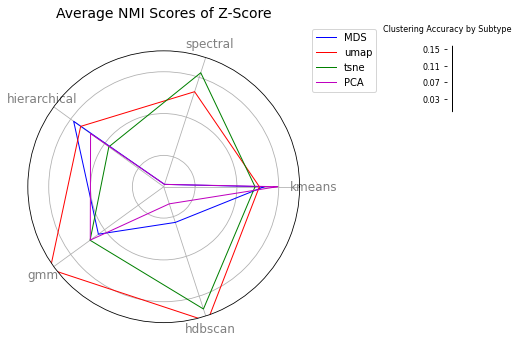

In [31]:
# Call calculate scores function
nmi_scores1, ari_scores1 = calculate_scores(coord_df1, ground_truth_labels1, n_clusters=2, n_iterations=10)

# Use average nmi scores to make radar plot
plot_radar_chart(nmi_scores1, 'Z-Score')

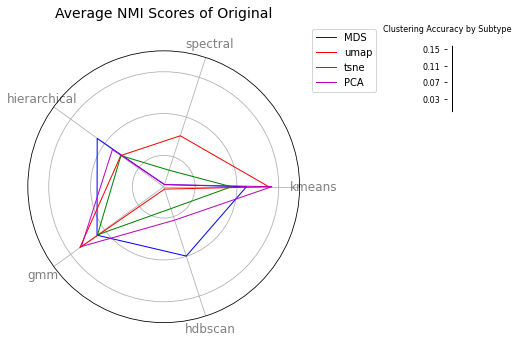

In [37]:
# Call calculate scores function
nmi_scores2, ari_scores2 = calculate_scores(coord_df2, ground_truth_labels2, n_clusters=2, n_iterations=10)

# Use average nmi scores to make radar plot
plot_radar_chart(nmi_scores2, 'Original')

In [32]:
# Print NMI scores and ARI scores
print('NMI Scores: ')
print(nmi_scores1)
print('ARI Scores: ')
print(ari_scores1)

NMI Scores: 
{'MDS': {'kmeans': 0.0960501538802836, 'spectral': 0.002382684913395325, 'hierarchical': 0.10649493762361854, 'gmm': 0.07724989390462578, 'hdbscan': 0.03587783154745976}, 'umap': {'kmeans': 0.09152162479766086, 'spectral': 0.09559544589236832, 'hierarchical': 0.09822120285054234, 'gmm': 0.13428124175513065, 'hdbscan': 0.13532270381210026}, 'tsne': {'kmeans': 0.08737151029206303, 'spectral': 0.11464866805188967, 'hierarchical': 0.06490675451297112, 'gmm': 0.08706895925569216, 'hdbscan': 0.12295067585485615}, 'PCA': {'kmeans': 0.10849909283123069, 'spectral': 0.002382684913395325, 'hierarchical': 0.08650609073975601, 'gmm': 0.0868254268895388, 'hdbscan': 0.01720145831690128}}
ARI Scores: 
{'MDS': {'kmeans': 0.07280799752355283, 'spectral': -0.0031918285771405535, 'hierarchical': 0.0794665365406945, 'gmm': -0.0696845266446886, 'hdbscan': 0.0005786904336582569}, 'umap': {'kmeans': 0.052242896985092734, 'spectral': -0.09014162650622698, 'hierarchical': -0.028715056891401684, 'g

In [38]:
# Print NMI scores and ARI scores
print('NMI Scores: ')
print(nmi_scores2)
print('ARI Scores: ')
print(ari_scores2)

NMI Scores: 
{'MDS': {'kmeans': 0.07917570242700277, 'spectral': 0.0021930758146874512, 'hierarchical': 0.07866865150454147, 'gmm': 0.078854223045509, 'hdbscan': 0.06973147776783574}, 'umap': {'kmeans': 0.1005984770824738, 'spectral': 0.05125817454958011, 'hierarchical': 0.05076925857084787, 'gmm': 0.09918026657785486, 'hdbscan': 0.0023860122184221856}, 'tsne': {'kmeans': 0.0648156694616289, 'spectral': 0.016611984138780782, 'hierarchical': 0.050618181018492484, 'gmm': 0.07828698440720269, 'hdbscan': 0.022027772248384866}, 'PCA': {'kmeans': 0.10321997674587455, 'spectral': 0.0021930758146874512, 'hierarchical': 0.0606374104447329, 'gmm': 0.09734083384111143, 'hdbscan': 0.03360714338064978}}
ARI Scores: 
{'MDS': {'kmeans': 0.05371503534608875, 'spectral': -0.0029982551311340494, 'hierarchical': 0.04698606234157556, 'gmm': 0.05660446021466688, 'hdbscan': 0.007652254621897986}, 'umap': {'kmeans': 0.048200697518679655, 'spectral': 0.013546563939020687, 'hierarchical': 0.006161172570471359,